In [1]:
from model import *
# from rgb_model import 
from data import *
from custom_callbacks import ValidatePredictions
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import time

import tensorflow as tf


'''

    Important Model Variables
    
'''
weights_path     ='weights/'
weights_name     = "Unet_{epoch}_{dice_coef}_{loss}.h5"
batch_size       = 2
tensorboard_logs = "logs/"

'''

    Making Directories

'''

os.system(f"mkdir -p {weights_path}")
os.system(f"mkdir -p {tensorboard_logs}")

0

### Train with data generator

In [2]:

'''
    Data Generator
    
'''

data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

train_generator = trainGenerator(batch_size,'../hubmap-organ-segmentation/tiles/','images','masks',data_gen_args,mask_color_mode="rgb", save_to_dir = None)
val_generator = trainGenerator(batch_size,'../hubmap-organ-segmentation/tiles/','val_images','val_masks',data_gen_args,mask_color_mode="rgb",save_to_dir = None)


'''

    Validate your Images

'''

image, label = next(train_generator)
for i in range(0,batch_size):
    print(image[i].shape)
    added_image = cv2.addWeighted(image[i],0.5,label[i],0.1,0)
    plt.imshow(added_image)
    plt.show()




Found 42825 images belonging to 1 classes.
Found 42825 images belonging to 1 classes.
(256, 256, 1)


error: OpenCV(4.6.0) /io/opencv/modules/core/src/arithm.cpp:647: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


/tmp/ipykernel_31718/992269985.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


1/1 [==============================] - 0s 146ms/step


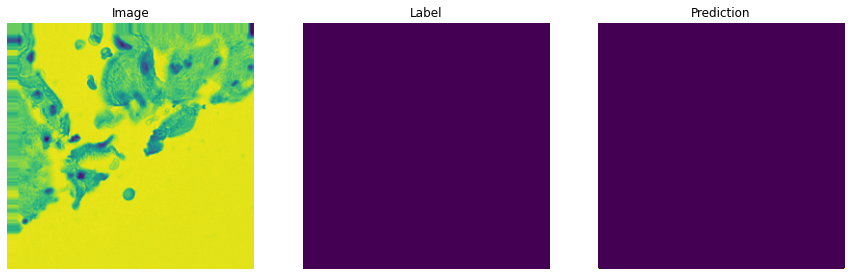

Epoch 1/1000
1/1 [==============================] - 0s 13ms/step


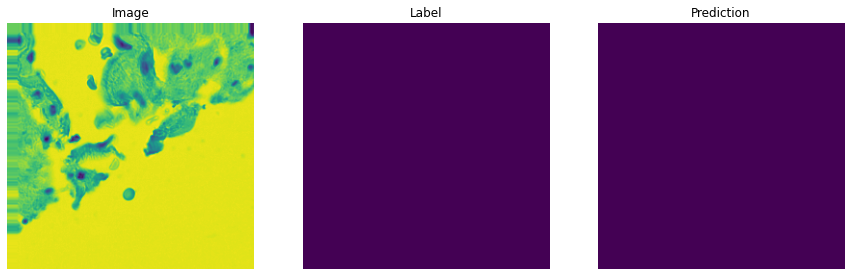

Epoch 2/1000
1/1 [==============================] - 0s 14ms/step


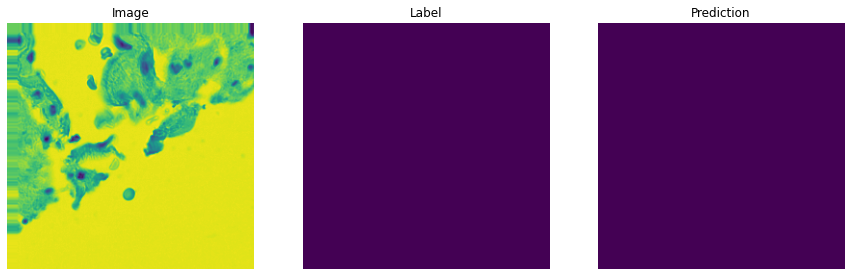

Epoch 3/1000
1/1 [==============================] - 0s 15ms/step


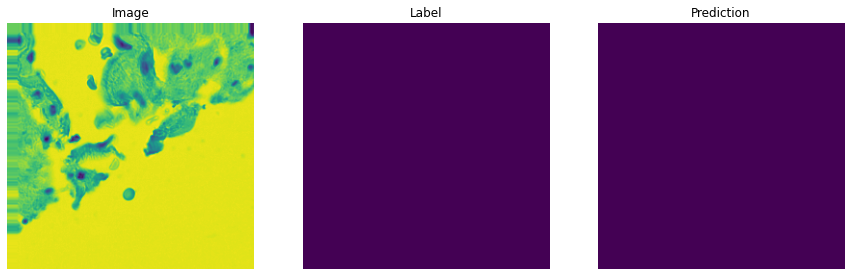

Epoch 4/1000
1/1 [==============================] - 0s 15ms/step


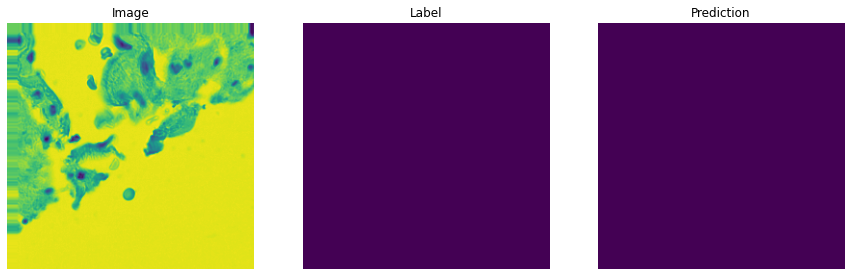

Epoch 5/1000
1/1 [==============================] - 0s 16ms/step


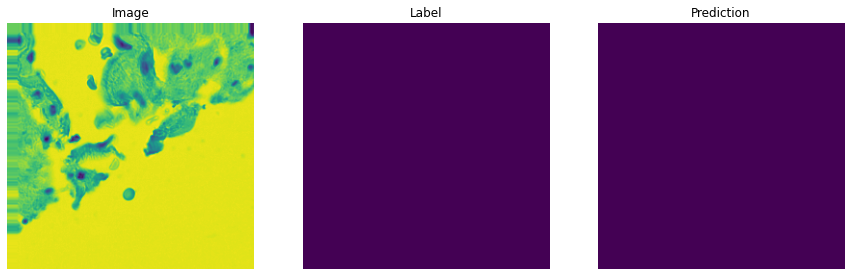

Epoch 6/1000
1/1 [==============================] - 0s 16ms/step


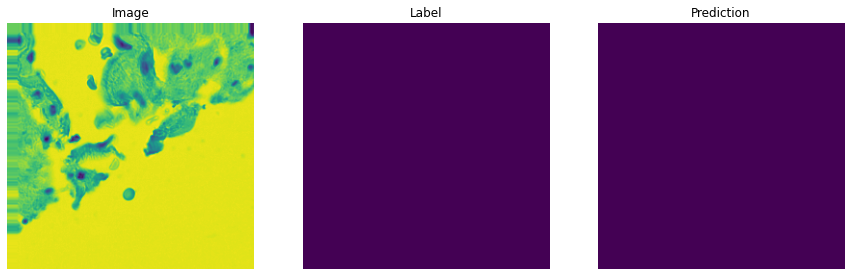

Epoch 7/1000
1/1 [==============================] - 0s 17ms/step


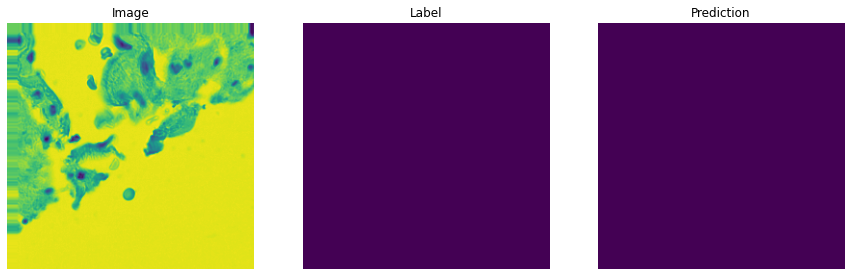

Epoch 8/1000
1/1 [==============================] - 0s 16ms/step


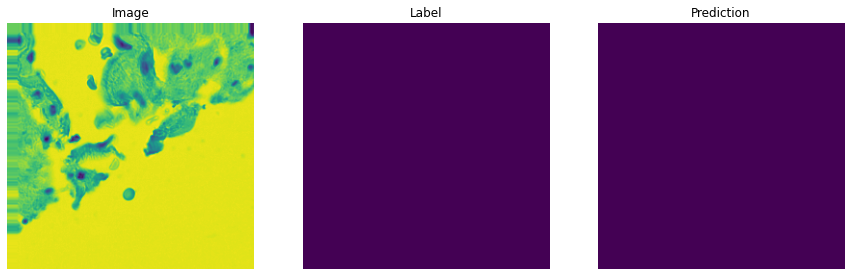

Epoch 9/1000
1/1 [==============================] - 0s 17ms/step


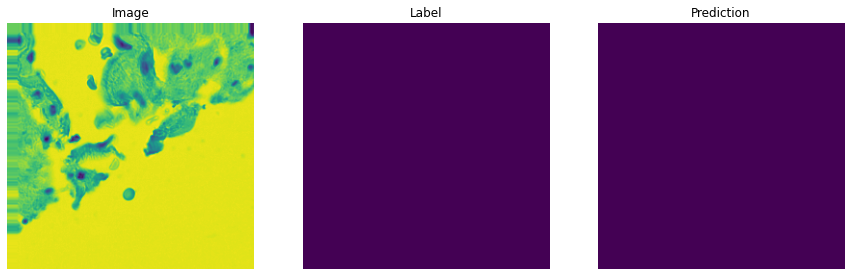

Epoch 10/1000
1/1 [==============================] - 0s 17ms/step


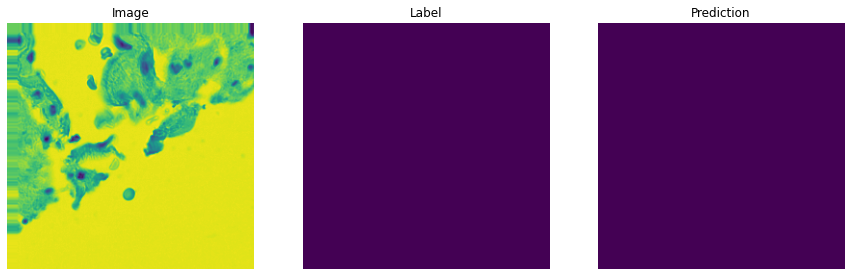

Epoch 11/1000
1/1 [==============================] - 0s 18ms/step


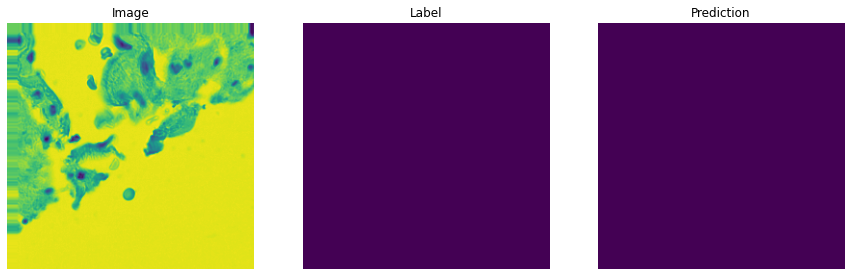

Epoch 12/1000
1/1 [==============================] - 0s 18ms/step


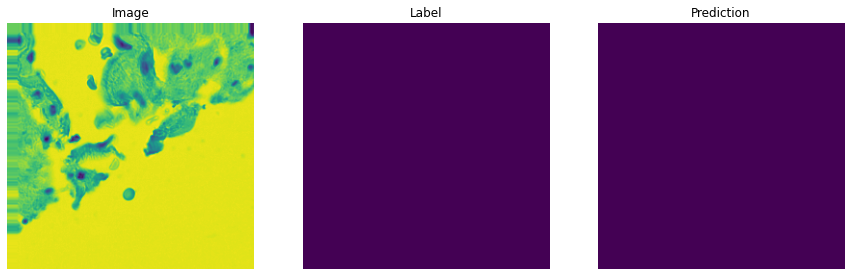

Epoch 13/1000
1/1 [==============================] - 0s 18ms/step


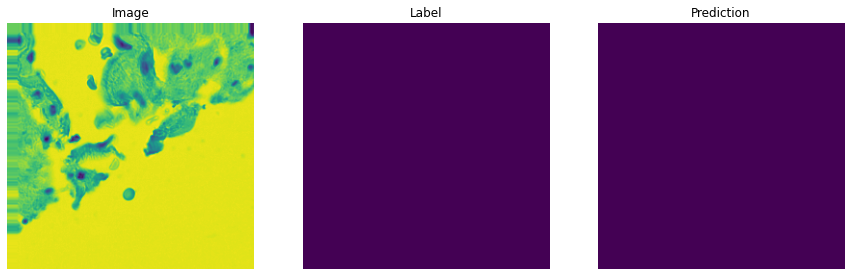

Epoch 14/1000
1/1 [==============================] - 0s 18ms/step


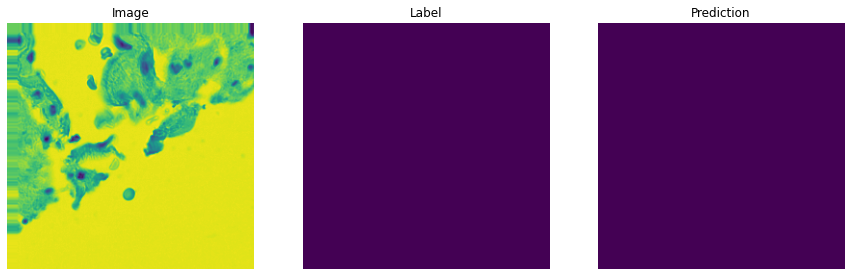

Epoch 15/1000
1/1 [==============================] - 0s 18ms/step


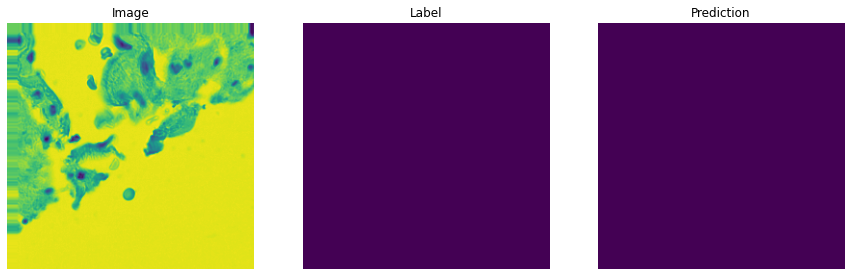

Epoch 16/1000
1/1 [==============================] - 0s 18ms/step


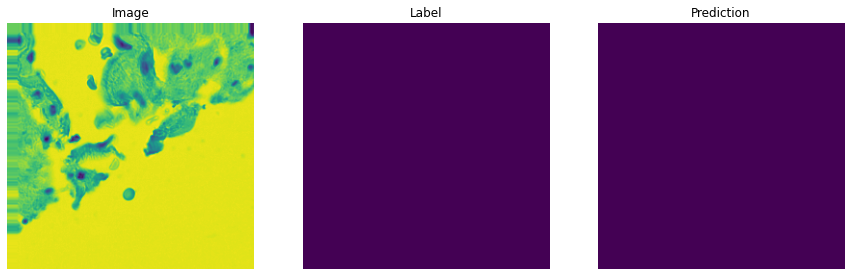

Epoch 17/1000
1/1 [==============================] - 0s 19ms/step


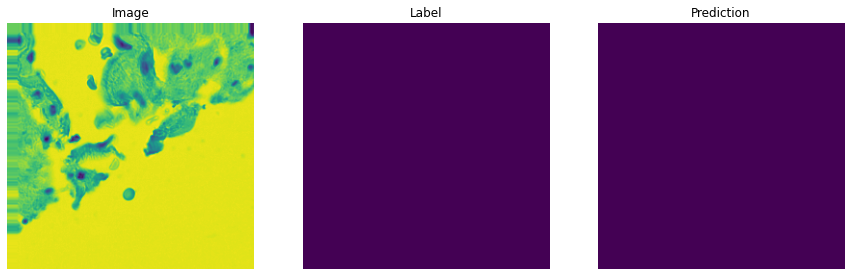

Epoch 18/1000
1/1 [==============================] - 0s 18ms/step


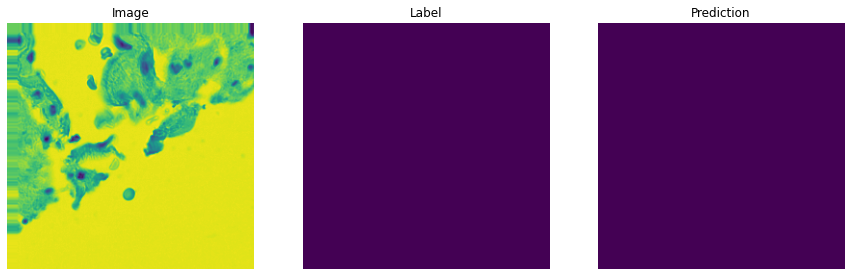

Epoch 19/1000
1/1 [==============================] - 0s 18ms/step


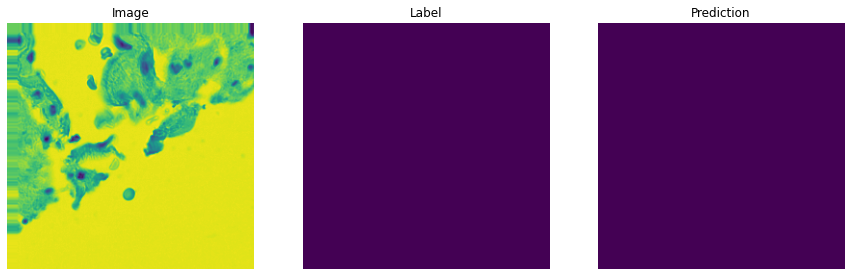

Epoch 20/1000
1/1 [==============================] - 0s 19ms/step


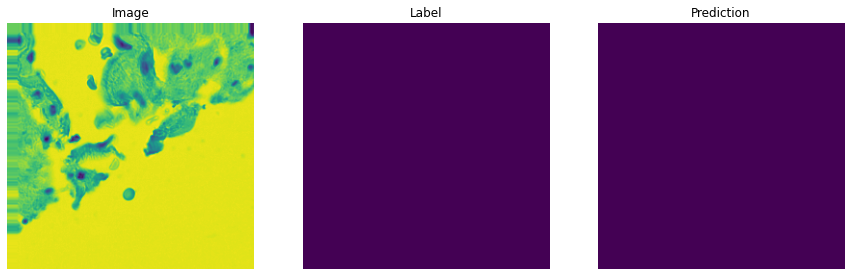

Epoch 21/1000
1/1 [==============================] - 0s 19ms/step


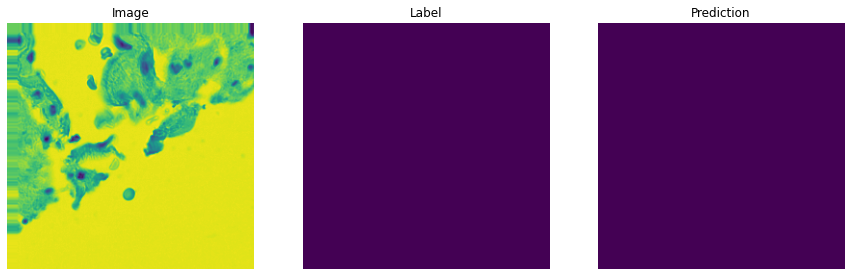

Epoch 22/1000
1/1 [==============================] - 0s 19ms/step


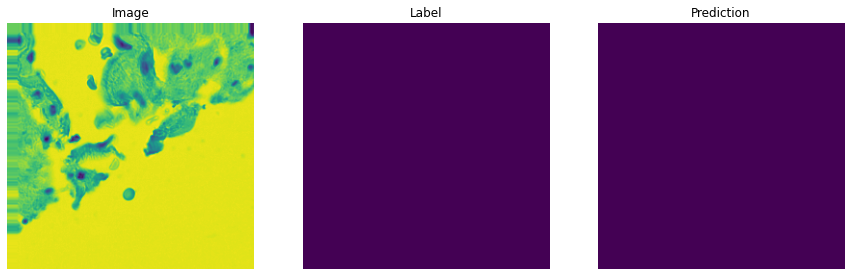

Epoch 23/1000
1/1 [==============================] - 0s 19ms/step


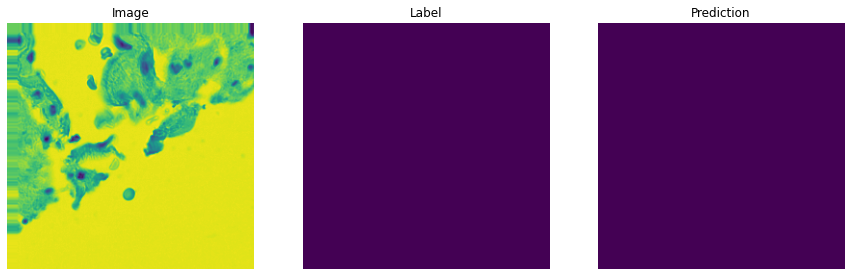

Epoch 24/1000
1/1 [==============================] - 0s 19ms/step


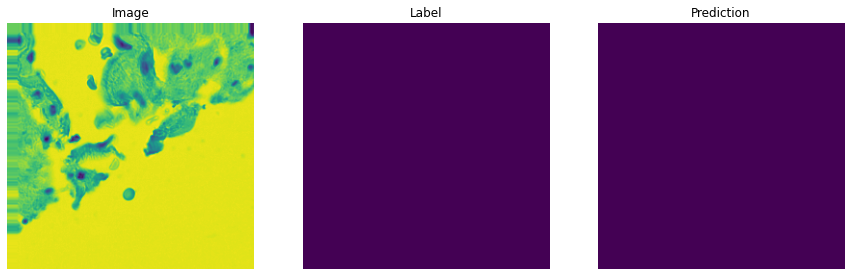

Epoch 25/1000
1/1 [==============================] - 0s 20ms/step


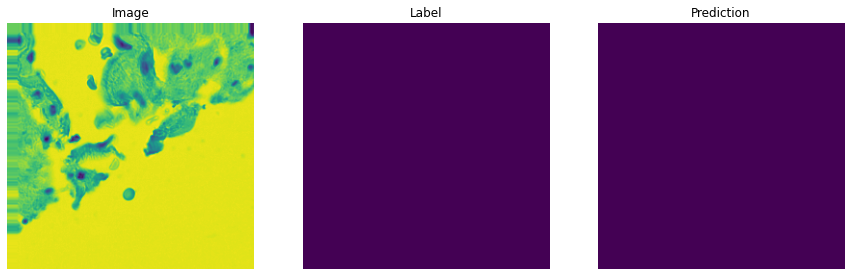

Epoch 26/1000
1/1 [==============================] - 0s 20ms/step


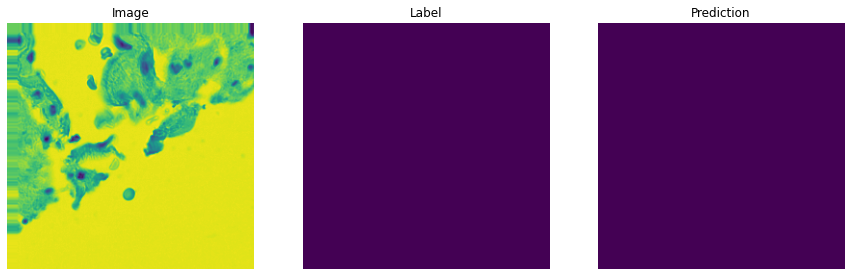

Epoch 27/1000
1/1 [==============================] - 0s 21ms/step


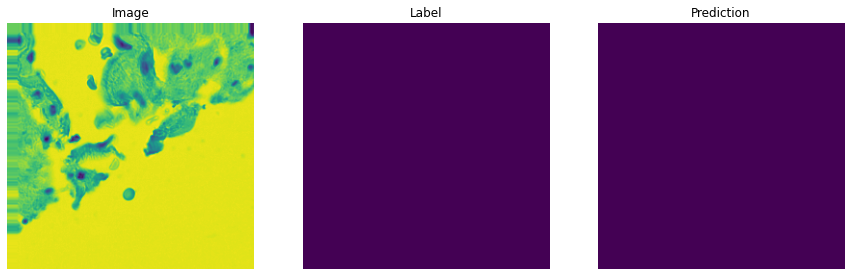

Epoch 28/1000
1/1 [==============================] - 0s 21ms/step


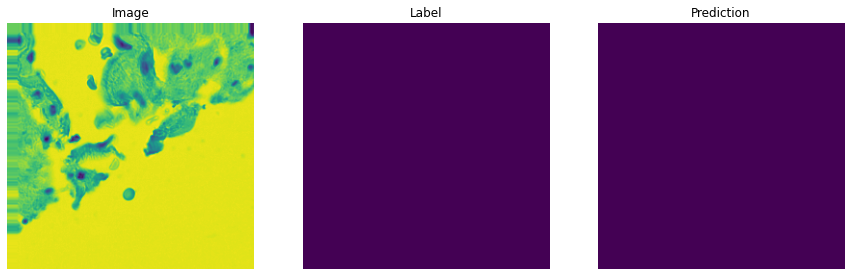

Epoch 29/1000
1/1 [==============================] - 0s 20ms/step


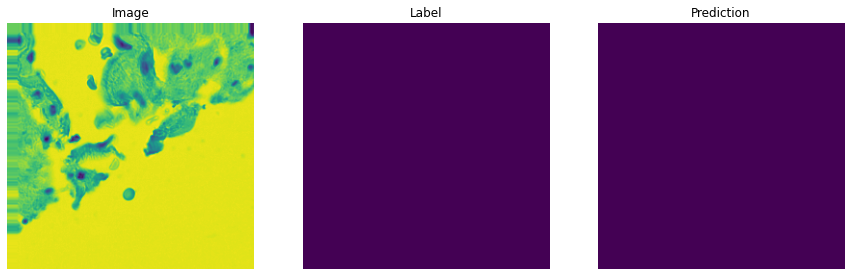

Epoch 30/1000
1/1 [==============================] - 0s 21ms/step


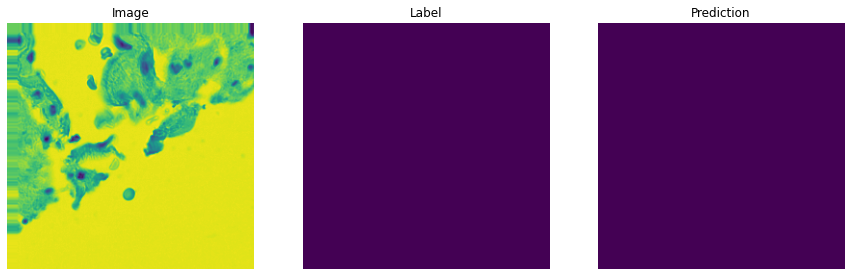

Epoch 31/1000
1/1 [==============================] - 0s 21ms/step


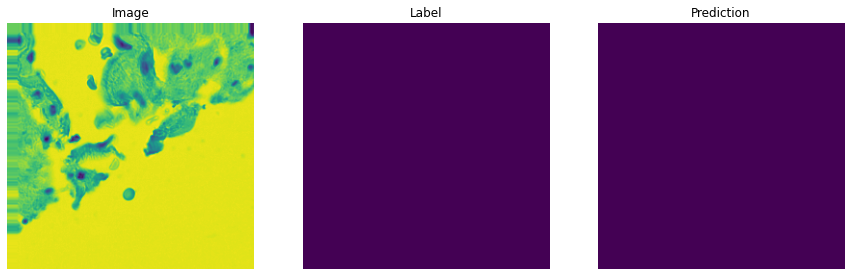

Epoch 32/1000
1/1 [==============================] - 0s 23ms/step


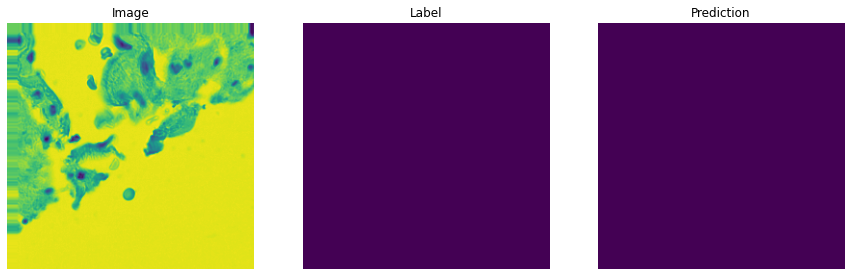

Epoch 33/1000
1/1 [==============================] - 0s 220ms/step


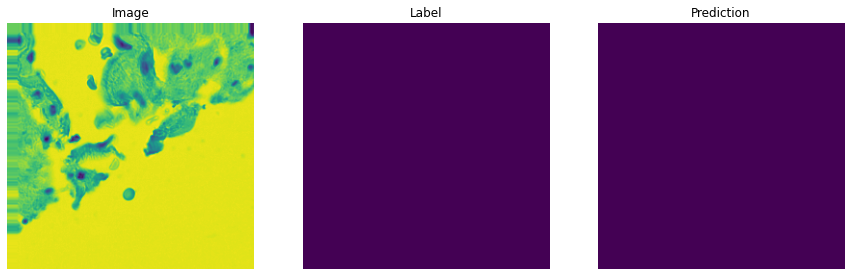

Epoch 34/1000
 542/4000 [===>..........................] - ETA: 19:57 - loss: 0.8677 - accuracy: 0.0882 - dice_coef: 0.1323

In [ ]:
model = unet("weights/Unet_11_0.13439464569091797_0.5054188370704651.h5")

with tf.device('/gpu:0'):
    model.fit_generator(
        train_generator,
        steps_per_epoch = 4000,
        epochs = 1000,
        callbacks = [
                     ModelCheckpoint(weights_path + weights_name,save_best_only=True,save_weights_only=True), 
                     TensorBoard(log_dir="./logs"),
                     ValidatePredictions(model, val_generator)


        ],
         validation_data= val_generator,
        validation_steps= 10,
        verbose =1,
        use_multiprocessing=True,
        workers = 6
    )
